# ORIE 4580/5580/5581 Assignment 2

#### Students: Mohamed Kane (mek298), Marco La Vecchia (mal426)

### Instructions


* Due Thursday September 11, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

**note** ChatGPT used to generate code and help with Latex formatting

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.


We begin with the  definition:

$$
N_p =
\begin{cases}
1 & \text{with probability } p, \\
1 + \tilde{N}_p & \text{with probability } 1-p
\end{cases}
$$

Taking expectations on both cases:

$$
\mathbb{E}[N_p] = p \cdot 1 + (1-p)\,\mathbb{E}[\,1+\tilde{N}_p\,]
$$

Since $\tilde{N}_p \overset{d}{=} N_p$:

$$
\mathbb{E}[N_p] = p \cdot 1 + (1-p)\cdot(1+\mathbb{E}[N_p])
$$

Now expand the terms carefully:

$$
\mathbb{E}[N_p] = p \cdot 1 + 1 + \mathbb{E}[N_p] - p - p\mathbb{E}[N_p]
$$

Collect like terms:

$$
\mathbb{E}[N_p] = 1 + \mathbb{E}[N_p] - p \cdot \mathbb{E}[N_p]
$$

Bring the $\mathbb{E}[N_p]$ terms to one side:

$$
p \cdot \mathbb{E}[N_p] = 1
$$

Therefore:

$$
\mathbb{E}[N_p] = \frac{1}{p}
$$

-----------
# Variance Calculation

$$
\mathrm{Var}(N_p)=\mathbb{E}[N_p^2]-\big(\mathbb{E}[N_p]\big)^2
$$

$$
\mathbb{E}[N_p^2]=p\cdot 1^2+(1-p)\,\mathbb{E}\!\left[(1+\tilde N_p)^2\right]
$$

$$
\mathbb{E}[N_p^2]=p+(1-p)\left(\mathbb{E}\left[\,1+\tilde N_p+\tilde N_p+\tilde N_p^{\,2}\right]\right)
$$

$$
\mathbb{E}[N_p^2]=p+(1-p)\big(1+2\,\mathbb{E}[N_p]+\mathbb{E}[N_p^2]\big)
$$

$$
\mathbb{E}[N_p^2]=p+1+2\,\mathbb{E}[N_p]+\mathbb{E}[N_p^2]-p-2p\,\mathbb{E}[N_p]-p\,\mathbb{E}[N_p^2]
$$

$$
-2\,\mathbb{E}[N_p]+2p\,\mathbb{E}[N_p]+p\,\mathbb{E}[N_p^2]=1
$$

Substitute
$$
\mathbb{E}[N_p]=\tfrac{1}{p}
$$

$$
-2\cdot\frac{1}{p}+2p\cdot\frac{1}{p}+p\,\mathbb{E}[N_p^2]=1
$$

$$
p\,\mathbb{E}[N_p^2]=1+\frac{2}{p}-2
$$

$$
\mathbb{E}[N_p^2]=\frac{2-p}{p^2}
$$

**Finally:**
$$
\mathrm{Var}(N_p)=\frac{2-p}{p^2}-\left(\frac{1}{p}\right)^2=\boxed{\frac{1-p}{p^2}}.
$$


___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans.
$$
\text{Define Indicator } I_i
$$

$$
I_i = \begin{cases}
1, & \text{if } x_i^2 + y_i^2 \leq 1, \\
0, & \text{o.w.}
\end{cases}
\quad i=1,\dots,n.
\quad N_c = \sum_{i=1}^n I_i
$$

$$
\mathbb{P}(I_i = 1) = \text{area of quarter unit circle} = \frac{\pi}{4}
$$

$$
I_i \ \text{are i.i.d. Bernoulli}(p) \ \text{with } p = \frac{\pi}{4}
$$

$$
N_c \sim \text{Binomial}(n, p)
$$

$$
\mathbb{E}[N_c] = \mathbb{E}\!\left[\sum_{i=1}^n I_i\right]
= \sum_{i=1}^n \mathbb{E}[I_i]
= np
= \frac{n\pi}{4}
$$

$$
\mathrm{Var}(N_c)
= \mathrm{Var}\!\left(\sum_{i=1}^n I_i\right)
= np(1-p)
= \frac{n\pi}{4}\left(1 - \frac{\pi}{4}\right)
$$

---

We want to estimate $\pi$ and $\mathbb{P}(x^2+y^2 \leq 1) = \frac{\pi}{4}$.

$$
\hat{\pi} := 4\hat{p} = 4\left(\frac{N_c}{n}\right)
$$

$$
\mathbb{E}[\hat{\pi}] = 4 \, \mathbb{E}\!\left[\frac{N_c}{n}\right]
= 4p = \pi \quad \checkmark
$$

$$
\mathrm{Var}[\hat{\pi}]
= \left(\frac{4}{n}\right)^2 \, \mathrm{Var}(N_c)
= \frac{4\pi - \pi^2}{n}
$$

---

So can you use this to get a better estimate of $\pi$?  
**No.** This does not give a tighter confidence interval.  
Probability of success is $\tfrac{\pi}{4}$ for both methods. Both methods have the same variance → identical variance.



---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

### Ans.
$$
\text{For each floor } f \in \{2,3,4,5,6\}, \text{ let } I_f = 1 \text{ if the elevator stops at floor } f, \text{ and } 0 \text{ otherwise.}
$$

$$
S = \sum_{f=2}^{6} I_f \quad \text{be the number of floors where the elevator stops.}
$$

$$
\mathbb{P}(I_f = 1) = 1 - \left(\frac{4}{5}\right)^4
$$

$$
\mathbb{E}[S] = \sum_{f=2}^{6} \mathbb{E}[I_f]
= 5 \left[ 1 - \left(\frac{4}{5}\right)^4 \right]
= 5 - \frac{5 \cdot 256}{625}
= \frac{1845}{625}
= \frac{369}{125}
\approx 2.952
$$


---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.

For each student $i \in \{1, \dots, N\}$, let  

$$
I_i = 1\{\text{student $i$ is a friend of both you and your partner}\}.
$$

total number of common friends is  

$$
C = \sum_{i=1}^N I_i .
$$

By linearity of expectation,  

$$
\mathbb{E}[C] = \sum_{i=1}^N \mathbb{E}[I_i]
= \sum_{i=1}^N \mathbb{P}(I_i = 1).
$$

Now,  

$$
\mathbb{P}(I_i = 1)
= \mathbb{P}(\text{you are friends with $i$}) \cdot \mathbb{P}(\text{partner is friends with $i$}),
$$

so  

$$
\mathbb{P}(I_i = 1) = \frac{n_1}{N} \cdot \frac{n_2}{N}.
$$

Therefore,  

$$
\mathbb{E}[C] = N \cdot \frac{n_1}{N} \cdot \frac{n_2}{N}
= \frac{n_1 n_2}{N}.
$$

For example, with $N = 22{,}000, n_1 = 500,$ and $n_2 = 440$,  

$$
\mathbb{E}[C] = \frac{500 \cdot 440}{22{,}000}
= \frac{220{,}000}{22{,}000}
= 10.
$$


___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.

Let \(N\) = # of true positive people

---

**(i)**

$$
N \sim \text{Binomial}(n, p)
$$

$$
\mathbb{E}[N] = np
$$

$$
\mathrm{Var}(N) = np(1-p)
$$

All independent Bernoulli’s.

---

**(ii)** We need to add correlation among household members.

$$
\mathbb{E}[N] = np
$$

$$
\mathrm{Var}(N) = np(1-p)\bigl(1 + (n-1)\rho \bigr)
$$

This should capture correlation between positives in one household.

This seems to match

$$
N \sim \text{Beta-Binomial}(n,\alpha,\beta), \quad
p = \frac{\alpha}{\alpha+\beta}
$$


___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.
Let $T \sim$ # of tests needed to be sure.  
Let $N \sim$ # of sick people (in sample).

$$
\mathbb{P}(T = 1) = \mathbb{P}(N = 0) \quad = 1 \text{ test}
$$

$$
\mathbb{P}(T = n+1) = \mathbb{P}(N > 0) = 1 - \mathbb{P}(N = 0) \quad = (n+1) \text{ tests}
$$

Define $I$ to be an indicator if someone in the pool is positive.  
We run 1 test, or $1+n$ tests if someone in the pool is positive.

$$
T = 1 + n \cdot I
$$

---

$$
\mathbb{E}[T] = \mathbb{E}[1 + nI] = 1 + n \cdot \mathbb{E}[I] = 1 + n \big(1 - \mathbb{P}(N=0)\big)
$$

---

$$
\text{Var}(T) = \text{Var}(1 + nI) = \text{Var}(1) + \text{Var}(nI) = n^2 \cdot \text{Var}(I)
$$

Since $I$ is Bernoulli $\big(1 - \mathbb{P}(N=0)\big)$,

$$
\text{Var}(T) = n^2 \cdot \mathbb{P}(N=0)\big(1 - \mathbb{P}(N=0)\big)
$$



___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

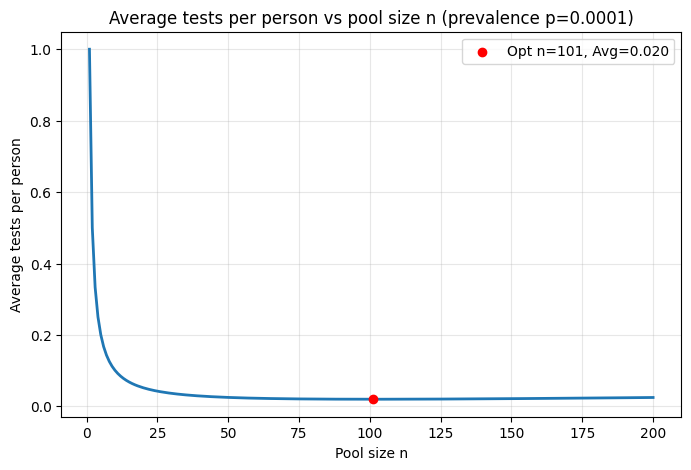

For prevalence 0.0001, optimal pool size n* = 101, min avg tests/person = 0.0200


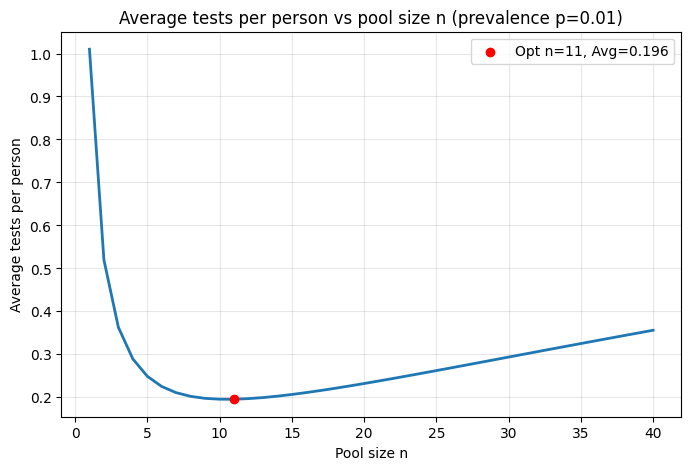

For prevalence 0.01, optimal pool size n* = 11, min avg tests/person = 0.1956


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Expected tests per person for pool size n and prevalence p
def avg_tests_per_person(n, p):
    return 1.0/n + 1.0 - (1.0 - p)**n

# Parameters
p_values = [1e-4, 1e-2]
ranges = {1e-4: 200, 1e-2: 40}   # search range of n for each prevalence

for p in p_values:
    ns = np.arange(1, ranges[p] + 1)
    A = avg_tests_per_person(ns, p)

    # Find optimal n
    n_opt = ns[np.argmin(A)]
    A_opt = A.min()

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(ns, A, lw=2)
    plt.scatter([n_opt], [A_opt], color="red", zorder=5, label=f"Opt n={n_opt}, Avg={A_opt:.3f}")
    plt.title(f"Average tests per person vs pool size n (prevalence p={p})")
    plt.xlabel("Pool size n")
    plt.ylabel("Average tests per person")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

    print(f"For prevalence {p}, optimal pool size n* = {n_opt}, "
          f"min avg tests/person = {A_opt:.4f}")


### Ans.





---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability $\mathbb{P}[\text{false positive test}|C]$ of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



### Ans.

The first model $\frac{1}{1 + \exp(-10(C - 35))}$ is the correct one because as C increases (say C > 35), it means that the viral load is lower which means it is less likely to be detected. A false negative means the test result comes back negative even though the person is actually positive. When CT is low (high viral load), there is enough virus making detection easy, so the probability of a false negative should be near zero. I have added a graphically representation below, showing that with the first model, we can an increasing function approaching a proability of 1 of false detection whereas the second function decreases and approaches 0, which would mean there is no false detection there.

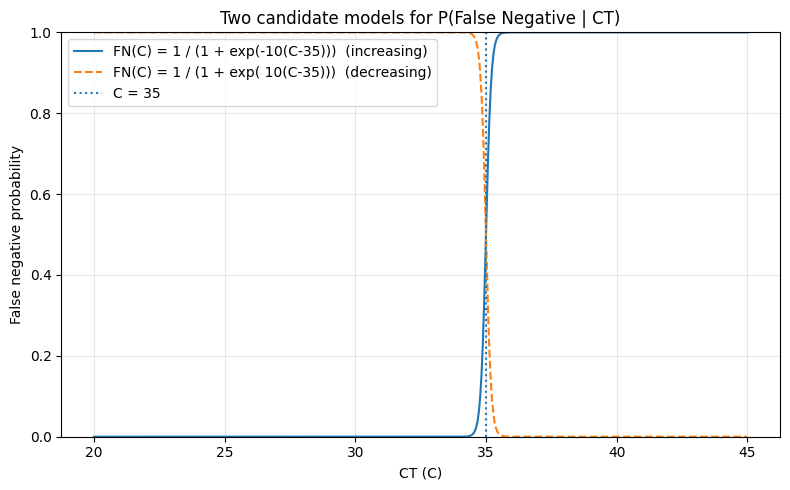

C=25: increasing-model FN=0.0000, decreasing-model FN=1.0000,  (they sum to 1.0000)
C=35: increasing-model FN=0.5000, decreasing-model FN=0.5000,  (they sum to 1.0000)
C=40: increasing-model FN=1.0000, decreasing-model FN=0.0000,  (they sum to 1.0000)


In [ ]:
# Visualizing the two candidate FN(C) models side-by-side
import numpy as np
import matplotlib.pyplot as plt

# Domain of CT values to visualize
C = np.linspace(20, 45, 500)

# Candidate models for P(FN | C)
fn_inc = 1.0 / (1.0 + np.exp(-10.0 * (C - 35.0)))  # increasing with C
fn_dec = 1.0 / (1.0 + np.exp( 10.0 * (C - 35.0)))  # decreasing with C

plt.figure(figsize=(8,5))
plt.plot(C, fn_inc, label=r"FN(C) = 1 / (1 + exp(-10(C-35)))  (increasing)")
plt.plot(C, fn_dec, label=r"FN(C) = 1 / (1 + exp( 10(C-35)))  (decreasing)", linestyle="--")
plt.axvline(35, linestyle=":", label="C = 35")
plt.xlabel("CT (C)")
plt.ylabel("False negative probability")
plt.title("Two candidate models for P(False Negative | CT)")
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Sanity checks at a few CTs
for c in [25, 35, 40]:
    a = 1.0 / (1.0 + np.exp(-10.0 * (c - 35.0)))
    b = 1.0 / (1.0 + np.exp( 10.0 * (c - 35.0)))
    print(f"C={c:>2}: increasing-model FN={a:.4f}, decreasing-model FN={b:.4f},  (they sum to 1.0000)")




---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is $\mathcal{N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is $\mathcal{N}(30, 3^2)$, and otherwise,  $C$ is $\mathcal{N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.



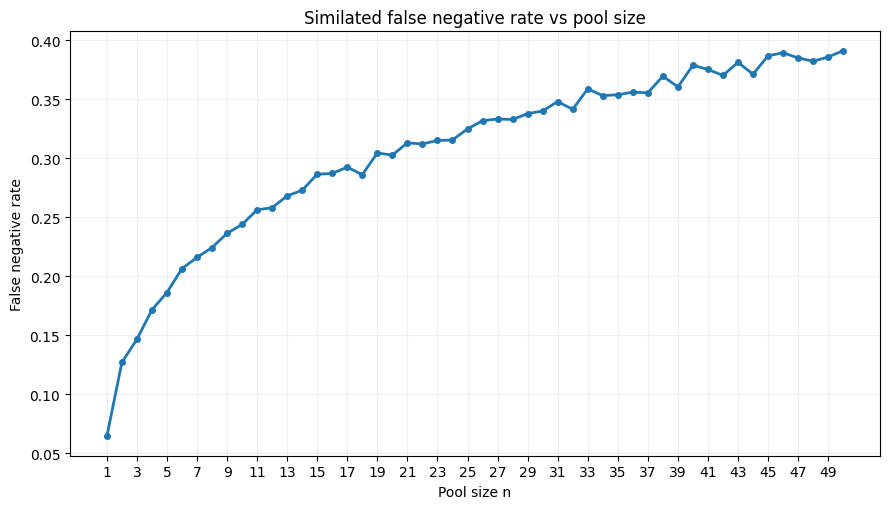

,n,false_negative_rate
0,1,0.0642
1,2,0.1270
2,3,0.1466
3,4,0.1716
4,5,0.1862
5,6,0.2066
6,7,0.2160
7,8,0.2244
8,9,0.2364
9,10,0.2440


Figure saved as false_negative_rate_vs_n_noCI.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

try:
    get_ipython().run_line_magic("matplotlib", "inline")
except Exception:
    pass

# -------------------- Controls --------------------
m = 5000               # simulations per n
n_min, n_max = 1, 50    # pool sizes to evaluate
rng = np.random.default_rng(42)  # reproducible RNG

# -------------------- Mixture model for CT --------------------
mix_probs = np.array([0.40, 0.50, 0.10])
means     = np.array([20.0, 30.0, 34.78])
stds      = np.array([ 3.5,  3.0,  1.3])

def sample_C(m: int) -> np.ndarray:
    comps = rng.choice(3, size=m, p=mix_probs)
    z_ = rng.standard_normal(size=m)
    return means[comps] + stds[comps] * z_

def pooled_CT(C: np.ndarray, n: int) -> np.ndarray:
    # One positive per pool diluted into n; CT shifts by log2(n)
    return C + math.log2(n)

def p_false_negative(C_pool: np.ndarray) -> np.ndarray:
    # Logistic detection curve: higher CT => higher FN probability
    # Steepness (10.0) and midpoint (35.0) are tunable if you want sensitivity analysis later
    return 1.0 / (1.0 + np.exp(-10.0 * (C_pool - 35.0)))

def simulate_false_negative_rate(n: int, m: int):
    C = sample_C(m)
    C_pool = pooled_CT(C, n)
    p_fn = p_false_negative(C_pool)
    # Bernoulli draws: 1 = false negative
    fn = (rng.random(size=m) < p_fn).astype(np.int8)
    phat = fn.mean()
    return phat

# -------------------- simulation --------------------
ns = np.arange(n_min, n_max + 1, dtype=int)
fn_rates = [simulate_false_negative_rate(n, m) for n in ns]

df = pd.DataFrame({
    "n": ns,
    "false_negative_rate": fn_rates
})

# -------------------- Plot --------------------
plt.figure(figsize=(9, 5.2))
plt.plot(df["n"].values, df["false_negative_rate"].values, 'o-', lw=2, ms=4)
plt.title("Similated false negative rate vs pool size")
plt.xlabel("Pool size n")
plt.xticks(np.arange(n_min, n_max+1, 2))
plt.ylabel("False negative rate")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("false_negative_rate_vs_n_noCI.png", dpi=150)
plt.show()

# Optional: preview and save the table
display(df.head(10))
df.to_csv("false_negative_rate_vs_n_noCI.csv", index=False)
print("Figure saved as false_negative_rate_vs_n_noCI.png")


## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

In [ ]:
def buffon(N,length,dist,num_lines = 2,seed=-1):
    """
    Generates a design matrix with Gaussian basis functions

    Parameters
    ----------
    N: number of throws
    length: length of toothpick
    dist: distance between lines
    num_lines: number of lines (should be >=2)
    seed: seed for random number generator; -1 for no seed

    Returns
    ----------
    sim_data: list of length N with outputs of sims
              each simulation output comprises:
              (tuples) (x_1,y_1), (x_2,y_2) of toothpick endpoints
              (int) number of line crossings

    """

    # Setting seed for PRNG (using -1 for no seed)
    if seed!=-1:
      np.random.seed(seed)

    # Generate random centers and angles of toothpicks
    # np.random.rand() generates a U[0,1] random variable
    xcent = 1+(num_lines-1)*np.random.rand(N)
    ycent = 1+(num_lines-1)*np.random.rand(N)
    theta = (np.pi/2.0)*np.random.rand(N)

    # Count number of times each toothpick touches a line
    crossed = (ycent - np.floor(ycent) - (length/2.0)*np.sin(theta) < 0).astype(int) + (ycent - np.floor(ycent) + (length/2.0)*np.sin(theta) > dist).astype(int)

    # Return toothpick endpoints, number of times each toothpick crosses
    sim_data  = list(zip(list(zip(xcent - (length/2.0)*np.cos(theta),ycent - (length/2.0)*np.sin(theta))),
                     list(zip(xcent + (length/2.0)*np.cos(theta),ycent + (length/2.0)*np.sin(theta))),
                     crossed))

    return sim_data

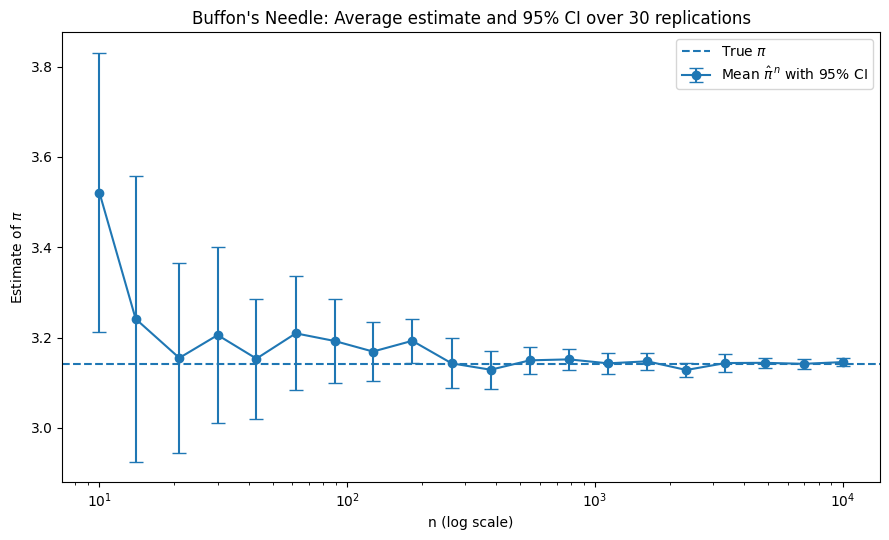

,n,mean_pi_hat,ci_lower,ci_upper
0,10,3.520899,3.211206,3.830593
1,14,3.241279,2.925117,3.557442
2,21,3.154810,2.943891,3.365728
3,30,3.205483,3.009903,3.401064
4,43,3.153268,3.020722,3.285813
5,62,3.209307,3.082922,3.335693
6,89,3.192351,3.100316,3.284387
7,127,3.168983,3.104579,3.233387
8,183,3.192750,3.144029,3.241472
9,264,3.142828,3.087428,3.198228


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Config (you can tweak) -----
replications = 30
# Log-spaced n's to cover 10..10k well; adjust if you want more/less points
n_vals = np.unique(np.round(np.logspace(np.log10(10), np.log10(10_000), 20)).astype(int))
length = 1
dist = 1
num_lines = 5  # must be >= 2
seed_base = 12345  # base seed for reproducibility; each replicate uses a different derived seed
# ----------------------------------

rng = np.random.default_rng(seed_base)

def pi_hat_once(n, seed=-1):
    """One replication using your buffon() function."""
    sim = buffon(n, length, dist, num_lines=num_lines, seed=seed)
    # item[2] is the number of crossings for that needle (0 or 1 here).
    # Just in case, clamp to {0,1}.
    n_cross = sum(1 if int(rec[2]) > 0 else 0 for rec in sim)
    return (2.0 * n / n_cross) if n_cross > 0 else np.nan

means = []
ci_lo = []
ci_hi = []

for n in n_vals:
    estimates = []
    # Collect 30 usable replications (avoid the rare N_cross=0 case by resampling)
    while len(estimates) < replications:
        seed = int(rng.integers(1, 2**31-1))
        est = pi_hat_once(n, seed=seed)
        if not np.isnan(est):
            estimates.append(est)
    estimates = np.array(estimates, dtype=float)

    mean_est = estimates.mean()
    # sample std with ddof=1
    s = estimates.std(ddof=1)
    se = s / np.sqrt(replications)
    # 95% CI using Normal approx; for small rep counts (30) this is standard practice
    lo = mean_est - 1.96 * se
    hi = mean_est + 1.96 * se

    means.append(mean_est)
    ci_lo.append(lo)
    ci_hi.append(hi)

# ----- Plot (single plot with means + 95% CI) -----
plt.figure(figsize=(9, 5.5))
yerr = np.vstack([np.array(means) - np.array(ci_lo), np.array(ci_hi) - np.array(means)])
plt.errorbar(n_vals, means, yerr=yerr, fmt='o-', capsize=5, label="Mean $\\hat\\pi^{\\,n}$ with 95% CI")
plt.axhline(np.pi, linestyle='--', label="True $\\pi$")
plt.xscale('log')
plt.xlabel("n (log scale)")
plt.ylabel("Estimate of $\\pi$")
plt.title("Buffon's Needle: Average estimate and 95% CI over 30 replications")
plt.legend()
plt.tight_layout()
plt.show()

# (Optional) show a small table of results
import pandas as pd
df = pd.DataFrame({
    "n": n_vals,
    "mean_pi_hat": np.round(means, 6),
    "ci_lower": np.round(ci_lo, 6),
    "ci_upper": np.round(ci_hi, 6),
})
df



---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.

In [ ]:
import numpy as np

def pi_hat_once(n, seed=None):
    sim = buffon(n, length=1, dist=1, num_lines=5, seed=-1 if seed is None else seed)
    n_cross = sum(1 if int(rec[2]) > 0 else 0 for rec in sim)
    return (2.0 * n / n_cross)

rng = np.random.default_rng(123)
R = 20000  # replications
ests = np.array([pi_hat_once(100, seed=int(rng.integers(1, 2**31-1))) for _ in range(R)])
print("mean(pi_hat):", ests.mean())
print("std(pi_hat):", ests.std(ddof=1))
print("bias estimate (mean - pi):", ests.mean() - np.pi)


mean(pi_hat): 3.159068945327392
std(pi_hat): 0.24438425604709185
bias estimate (mean - pi): 0.017476291737598793


It is an **overestimate**. Larger than π.

**(c)** Can you mathematically justify your observation from part (b)?

### Ans.

Yes.

$$
\hat{\pi}^n = \frac{2}{\hat{p}},
\quad \text{where } \hat{p} = \frac{N_{\text{cross}}}{n}.
$$

$\hat{p}$ is an unbiased estimator of  

$$
p = \frac{2}{\pi}.
$$

---

However, consider $f(x) = \tfrac{2}{x}$.  
This is a convex function since  

$$
f''(x) = \frac{4}{x^3} > 0.
$$

---

By Jensen’s inequality:  

$$
\mathbb{E}[f(\hat{p})] \;\geq\; f(\mathbb{E}[\hat{p}]).
$$

That is,  

$$
\mathbb{E}\!\left[\frac{2}{\hat{p}}\right]
> \frac{2}{\mathbb{E}[\hat{p}]}.
$$

So,  

$$
\mathbb{E}[\hat{\pi}^n] > \frac{2}{p}.
$$

But since $\frac{2}{p} = \pi$,  

$$
\mathbb{E}[\hat{\pi}^n] > \pi.
$$

---

Therefore,  

$$
\hat{\pi}^n \;\; \text{overestimates } \pi \text{ on average}.
$$


**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

### Ans.
Yes.  

$$
\mathbb{E}[N_{\text{cross}}] = \frac{2n}{\pi}
$$

Let $R$ = replications.  

$$
\bar{N} = \frac{1}{R} \sum_{r=1}^R N_r,
\qquad
S = \sqrt{\frac{1}{R-1} \sum_{r=1}^R (N_r - \bar{N})^2 }.
$$

---

A $(1-\alpha)$ confidence interval for $N_{\text{cross}}$ is  

$$
\big[ L_{N_{\text{cross}}}, \, U_{N_{\text{cross}}} \big]
= \bar{N} \; \pm \; z_{0.975} \, \frac{S}{\sqrt{R}}
$$

or equivalently using the $t$-distribution:  

$$
\bar{N} \; \pm \; t_{0.975, \, R-1} \, \frac{S}{\sqrt{R}}.
$$

---

Thus, the confidence interval for $\pi$ is  

$$
\pi \in \left( \frac{2n}{U_{N_{\text{cross}}}}, \; \frac{2n}{L_{N_{\text{cross}}}} \right).
$$


**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.

Let $X =$ the # of people who arrive by 7 p.m.  

$$
X \sim \text{Binomial}(1600, 0.95)
$$

We want to show that Ticketmaster overbooked if \(X > 1500\).  
That is, we want the probability:

$$
\mathbb{P}(X \geq 1501) = \sum_{k=1501}^{1600} \binom{1600}{k} (0.95)^k (0.05)^{1600-k}.
$$

---

The Central Limit Theorem tells us that for large \(n\),  
the binomial distribution is very close to a normal distribution with the same mean and variance.  

Approximating with a normal distribution lets us compute this probability without summing binomial terms.

---

The mean and variance are:  

$$
\mu = np = 1600 \cdot 0.95 = 1520,
$$

$$
\sigma^2 = np(1-p) = 76,
\quad \sigma = \sqrt{76} \approx 8.7178.
$$

---

Using continuity correction:

$$
\mathbb{P}(X \geq 1501)
\approx \mathbb{P}\!\left(Z \geq \frac{1500.5 - 1520}{8.7178}\right)
= \mathbb{P}(Z \geq -2.2368).
$$

Thus,

$$
\mathbb{P}(X \geq 1500) \approx 0.987 \quad (98.7\%).
$$

So, there is about a **98.7% chance** that Ticketmaster overbooked.


**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns 100 in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of 500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1500) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

### Ans.

Optimal tickets to sell S*: 1571
Over capacity: 71
Estimated expected profit at S*: $156,667.14


,tickets_sold_S,over_capacity (S-1500),estimated_expected_profit
63,1563,63,156243.6975
64,1564,64,156323.9625
65,1565,65,156398.4000
66,1566,66,156464.9400
67,1567,67,156530.4375
68,1568,68,156579.0200
69,1569,69,156615.4325
70,1570,70,156647.4600
71,1571,71,156667.1350
72,1572,72,156661.0200


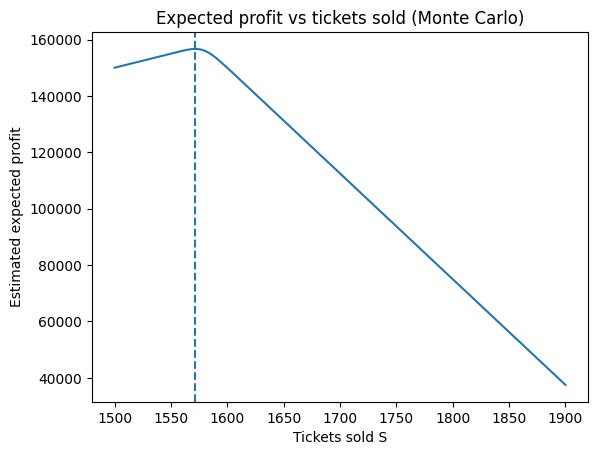

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

capacity = 1500
p_show = 0.95
profit_per_ticket = 100
fine_per_excess = 500

S_min, S_max = 1500, 1900

trials = 200_000
seed = 42

rng = np.random.default_rng(seed)
S_vals = np.arange(S_min, S_max + 1)
mean_profit = np.zeros_like(S_vals, dtype=float)

batch = 20_000
num_batches = math.ceil(trials / batch)

for b in range(num_batches):
    cur = batch if b < num_batches - 1 else (trials - batch*(num_batches-1))
    arrivals = rng.binomial(S_vals, p_show, size=(cur, len(S_vals)))
    excess = np.clip(arrivals - capacity, 0, None)
    profits = profit_per_ticket * S_vals - fine_per_excess * excess
    mean_profit += profits.mean(axis=0)

mean_profit /= num_batches

df = pd.DataFrame({
    "tickets_sold_S": S_vals,
    "over_capacity (S-1500)": S_vals - capacity,
    "estimated_expected_profit": mean_profit
})

best_idx = int(np.argmax(mean_profit))
best_S = int(S_vals[best_idx])
best_over_capacity = int(best_S - capacity)
best_profit = float(mean_profit[best_idx])

print(f"Optimal tickets to sell S*: {best_S}")
print(f"Over capacity: {best_over_capacity}")
print(f"Estimated expected profit at S*: ${best_profit:,.2f}")

window = 8
lo, hi = max(0, best_idx - window), min(len(df), best_idx + window + 1)
display(df.iloc[lo:hi])

plt.figure()
plt.plot(df["tickets_sold_S"], df["estimated_expected_profit"])
plt.axvline(best_S, linestyle='--')
plt.title("Expected profit vs tickets sold (Monte Carlo)")
plt.xlabel("Tickets sold S")
plt.ylabel("Estimated expected profit")
plt.show()



Expected over is 71 tickets.



---



**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1600$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.